In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_table('charginn.txt',names=['pId', 'status', 'charge', 'mass', 'pt', 'phi', 'eta', 'p', 'beta', 'gamma', 'less10Gev', 'notNearTrack'])

df.head()

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack
0,1000024,62,1,700.048,109.149,2.742540,3.079860,1189.790,0.861881,1.97195,0,0
1,-1000024,62,-1,700.048,134.275,-0.234468,-0.022846,134.310,0.188422,1.01824,0,1
2,1000024,62,1,700.048,279.622,0.529638,-2.061050,1115.910,0.847108,1.88175,0,1
3,-1000024,62,-1,700.048,249.409,-2.786050,-1.943630,888.797,0.785585,1.61615,0,1
4,-1000024,62,-1,700.048,283.369,0.710112,-1.121270,480.965,0.566274,1.21327,0,0


In [2]:
less10GeV = df[df['less10Gev'] == 1]

less10GeV.head()

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack


In [3]:
notNear = df[df['notNearTrack'] == 0]
notNear.head()

,pId,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack
0,1000024,62,1,700.048,109.149,2.742540,3.079860,1189.790,0.861881,1.97195,0,0
4,-1000024,62,-1,700.048,283.369,0.710112,-1.121270,480.965,0.566274,1.21327,0,0
5,1000024,62,1,700.048,306.623,2.455400,1.494320,717.605,0.715809,1.43206,0,0
17,1000024,62,1,700.048,290.867,-0.200109,0.638349,352.170,0.449403,1.11941,0,0
23,1000024,62,1,700.048,203.160,-2.654070,2.571330,1336.750,0.885874,2.15551,0,0


In [4]:
df.shape

(13202, 12)

In [5]:
notNear.shape

(3774, 12)

In [6]:
less10GeV.shape

(0, 12)

In [7]:
ctau = pd.read_table('ctau.txt', names=['cTau', 'cTau*boost'])

ctau.head()

,cTau,cTau*boost
0,167.75800,98.7050
1,19.89770,103.7100
2,313.30900,196.5500
3,366.32400,288.5300
4,3.86992,5.6327


array([[<AxesSubplot:title={'center':'cTau'}>,
        <AxesSubplot:title={'center':'cTau*boost'}>]], dtype=object)

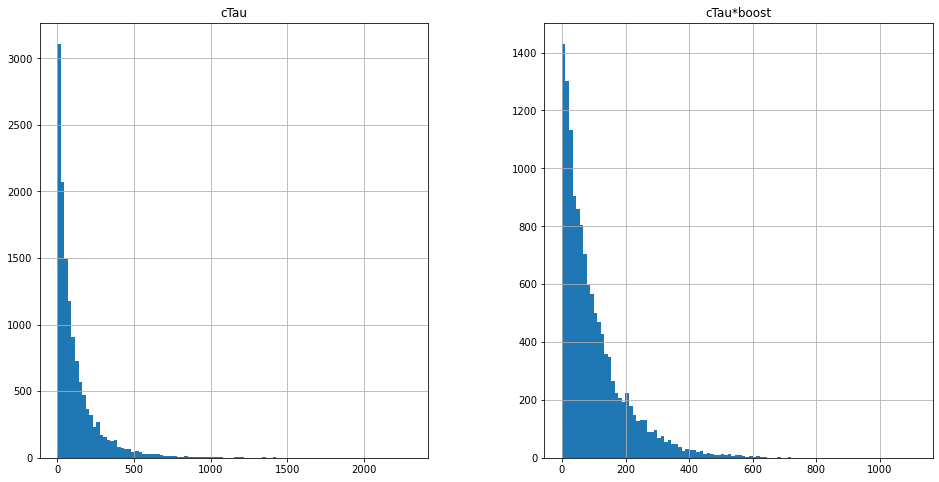

In [8]:
ctau.hist(bins=100,figsize=(16,8))

In [9]:
tracks = pd.read_table('tracksCharginos.txt', names=['charge','pt','phi','eta','validHits'])

validHits = tracks['validHits']
print(validHits)

0        4
1       24
2       25
3        3
4       18
        ..
9423     8
9424    11
9425    20
9426     7
9427     5
Name: validHits, Length: 9428, dtype: int64


In [10]:
df['cTau'] = ctau['cTau']
df['cTau*boost'] = ctau['cTau*boost']

trackedCharginos = df[df['notNearTrack']==1]
trackedCharginos.insert(1, "validHits", validHits)

trackedCharginos.head()

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost
1,-1000024,24.0,62,-1,700.048,134.275,-0.234468,-0.022846,134.310,0.188422,1.01824,0,1,19.8977,103.71
2,1000024,25.0,62,1,700.048,279.622,0.529638,-2.061050,1115.910,0.847108,1.88175,0,1,313.3090,196.55
3,-1000024,3.0,62,-1,700.048,249.409,-2.786050,-1.943630,888.797,0.785585,1.61615,0,1,366.3240,288.53
6,-1000024,14.0,62,-1,700.048,116.069,-2.465940,2.642970,819.801,0.760465,1.53993,0,1,368.9790,315.08
7,1000024,10.0,62,1,700.048,526.916,1.445640,-0.111461,530.192,0.603751,1.25443,0,1,189.7580,250.55


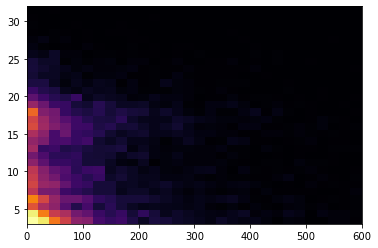

In [11]:
im = plt.hist2d(trackedCharginos['cTau'], validHits, bins=30,range=[[0,600],[3,32]], cmap='inferno')

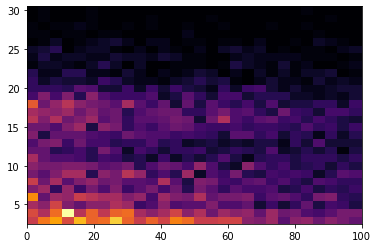

In [16]:
_,_,_,im = plt.hist2d(trackedCharginos['cTau*boost'], validHits, bins=28, range=[[0,100],[2.5,30.5]], cmap='inferno')

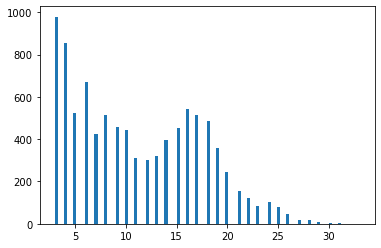

In [18]:
_,_,im = plt.hist(validHits,bins=100)

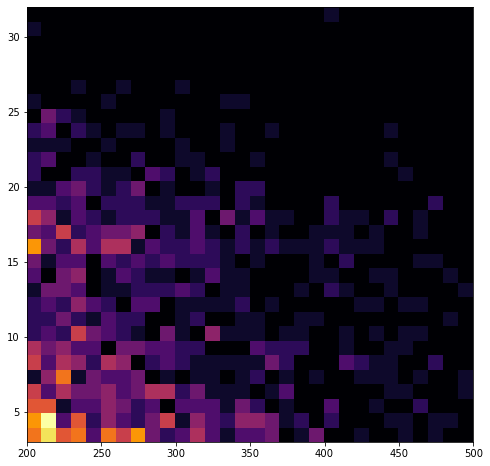

In [19]:
ctau200 = trackedCharginos[trackedCharginos['cTau*boost'] > 200]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

_,_,_,im = ax.hist2d(ctau200['cTau*boost'], ctau200['validHits'], bins=30, range=[[200,500],[3,32]], cmap='inferno')

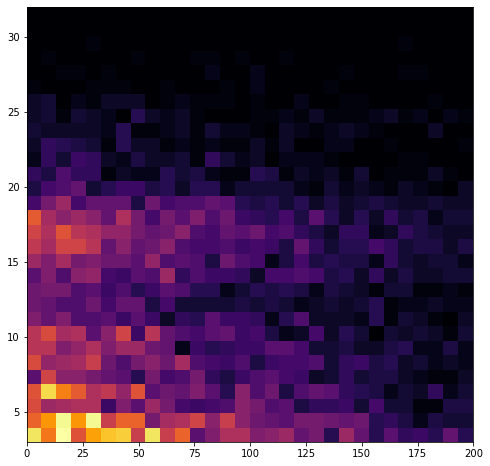

In [20]:
cTauG200 = trackedCharginos[trackedCharginos['cTau*boost'] > 200]
cTauL200 = trackedCharginos[trackedCharginos['cTau*boost'] < 200]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

_,_,_,im = ax.hist2d(cTauL200['cTau*boost'], cTauL200['validHits'], bins=30, range=[[0,200],[3,32]], cmap='inferno')

In [79]:
copyCharginos = trackedCharginos.copy()

copyCharginos.sort_values('cTau*boost', inplace=True)
copyCharginos.tail()

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost
5057,1000024,19.0,62,1,700.048,788.451,2.934160,0.129825,795.104,0.750547,1.51328,0,1,1540.720,839.44
5594,-1000024,13.0,62,-1,700.048,614.763,0.865587,-0.206902,627.968,0.667745,1.34338,0,1,2303.350,852.02
356,1000024,15.0,62,1,700.048,226.279,-0.499792,1.903660,776.074,0.742541,1.49298,0,1,1020.270,920.32
1866,1000024,3.0,62,1,700.048,256.978,1.836530,-1.360430,533.797,0.606350,1.25755,0,1,926.875,950.01
2369,1000024,6.0,62,1,700.048,449.233,-1.634340,0.758833,584.900,0.641172,1.30311,0,1,967.235,1110.10


In [90]:
def createLabel10s(cTau):
    return (10 * np.ceil(cTau / 10))

cTauRange = float(copyCharginos[-1:]['cTau*boost'])
cTauIntervals10 = range(0, int(np.ceil(cTauRange/10)))

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['cTau*boost'])
trackedCharginos.tail() 

,pId,validHits,status,charge,mass,pt,phi,eta,p,beta,gamma,less10Gev,notNearTrack,cTau,cTau*boost,cTauLabel10s
13193,1000024,NaN,62,1,700.048,577.901,-1.045540,0.458945,639.839,0.674651,1.35476,0,1,32.7905,43.017,50.0
13197,-1000024,NaN,62,-1,700.048,482.926,1.700250,1.639210,1290.680,0.879027,2.09743,0,1,141.5710,74.741,80.0
13198,1000024,NaN,62,1,700.048,449.153,-0.563679,0.416271,488.633,0.572361,1.21951,0,1,14.6682,20.496,30.0
13199,1000024,NaN,62,1,700.048,647.497,0.149279,0.791069,860.883,0.775858,1.58502,0,1,42.6671,123.220,130.0
13201,1000024,NaN,62,1,700.048,112.671,0.089468,0.924968,164.406,0.228629,1.02721,0,1,400.2470,280.030,290.0


In [94]:
cTauIn10s = trackedCharginos.groupby('cTauLabel10s')['validHits'].sum()

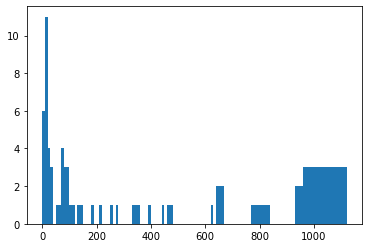

In [120]:
im = plt.subplots(111)
ax = im.

_,_,_ = plt.hist(cTauIn10s, bins = cTauIn10s.index)